In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Flipkart_Mobile_Sales.csv')

In [3]:
df.head()

,Brand,Model,Base_color,Processor,Screen_size,ROM,RAM,Display_size,Num_rear_camera,Num_front_camera,Battery_capacity,Ratings,Num_of_ratings,Sales_price,Discount_percent,Sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
df.describe()

,ROM,RAM,Display_size,Num_rear_camera,Num_front_camera,Battery_capacity,Ratings,Num_of_ratings,Sales_price,Discount_percent,Sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             430 non-null    object 
 1   Model             430 non-null    object 
 2   Base_color        430 non-null    object 
 3   Processor         430 non-null    object 
 4   Screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   Display_size      430 non-null    float64
 8   Num_rear_camera   430 non-null    int64  
 9   Num_front_camera  430 non-null    int64  
 10  Battery_capacity  430 non-null    int64  
 11  Ratings           430 non-null    float64
 12  Num_of_ratings    430 non-null    int64  
 13  Sales_price       430 non-null    int64  
 14  Discount_percent  430 non-null    float64
 15  Sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [6]:
df.isnull().sum()

Brand               0
Model               0
Base_color          0
Processor           0
Screen_size         0
ROM                 0
RAM                 0
Display_size        0
Num_rear_camera     0
Num_front_camera    0
Battery_capacity    0
Ratings             0
Num_of_ratings      0
Sales_price         0
Discount_percent    0
Sales               0
dtype: int64

# Brand-wise Market Share

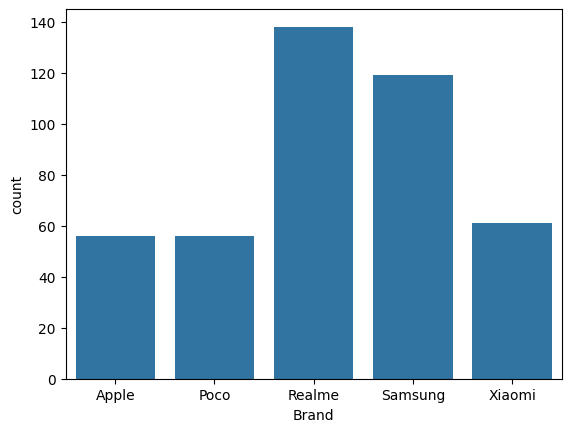

In [7]:
sns.countplot(data = df, x = "Brand")
plt.show()

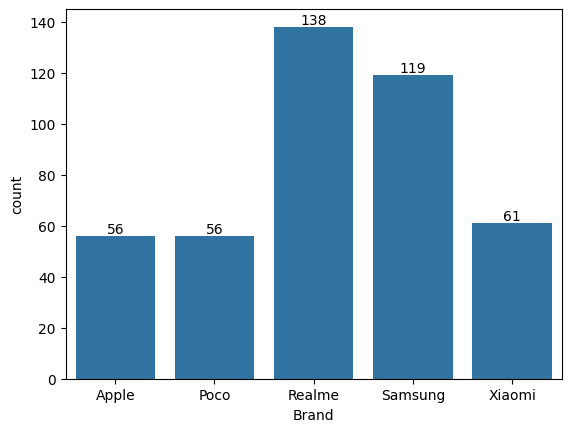

In [8]:
ax = sns.countplot(data = df, x = "Brand")
ax.bar_label(ax.containers[0])
plt.show()

### So, from the above chart we have analysed the following:
- Realme is the most ordered brand
- Samsung is the second most ordered brand
- Xiaomi is the third most ordered brand
- Apple and Poco are equally and least ordered

## Processor and Ratings

In [9]:
group_by_Processor = df.groupby("Processor").agg({"Sales":'mean', "Ratings": 'mean', "Num_of_ratings":'mean'}).round({"Sales": 0, "Ratings": 1, "Num_of_ratings": 0})
print(group_by_Processor)

           Sales  Ratings  Num_of_ratings
Processor                                
Ceramic      3.0      4.6           502.0
Exynos      21.0      4.2         13819.0
MediaTek    32.0      4.3         31023.0
Others       6.0      4.3          4499.0
Qualcomm    36.0      4.3         27523.0
Water       53.0      4.6         14442.0
iOS         33.0      4.6          7888.0


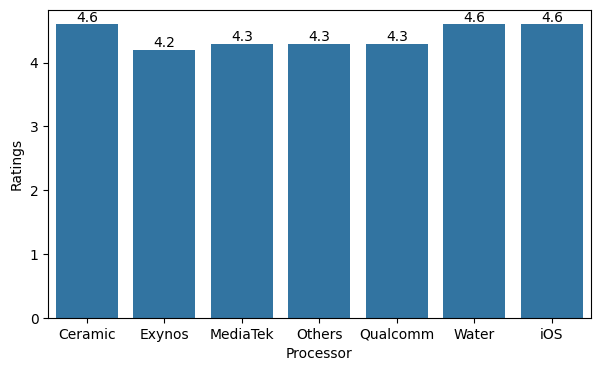

In [10]:
plt.figure(figsize = (7, 4))
axis = sns.barplot(data=group_by_Processor, y = "Ratings", x = "Processor")
axis.bar_label(axis.containers[0])
plt.show()

###  From the above chart we have analysed:
* Processor impacts the performance of the phone hence influences their ratings

## Impact of RAM, ROM and Battery capacity on Price

In [11]:
RAM_ROM_BATC = df.groupby(["RAM", "ROM", "Battery_capacity"]).agg({"Sales_price":'mean'}).round(0).sort_values(by=['Sales_price'])
print(RAM_ROM_BATC)

                          Sales_price
RAM ROM Battery_capacity             
2   32  3000                   5742.0
    16  4000                   6499.0
    32  4000                   6999.0
        5000                   7639.0
        3400                   7990.0
...                               ...
4   256 2815                  75649.0
8   128 3300                  84999.0
    256 3300                  88999.0
12  256 4400                 149999.0
    512 4400                 157999.0

[83 rows x 1 columns]


Text(0.5, 1.0, 'Relation between RAM and Sales_price of phones')

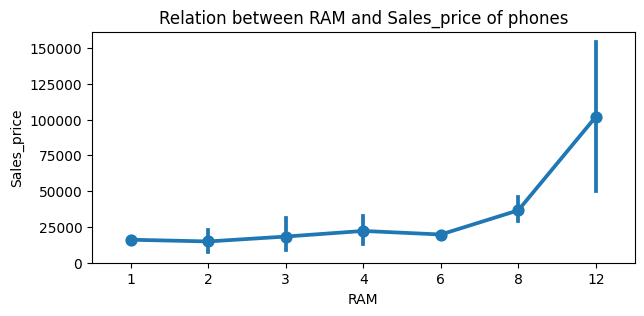

In [48]:
plt.figure(figsize = (7, 3))
axs = sns.pointplot(data = RAM_ROM_BATC, x = "RAM", y = "Sales_price")
plt.title("Relation between RAM and Sales_price of phones")

Text(0.5, 1.0, 'Relation between T and Sales_price of phones')

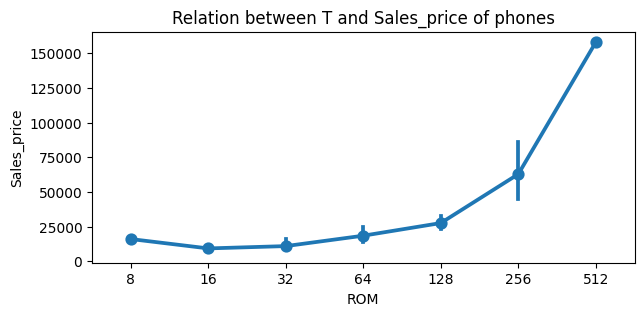

In [49]:
plt.figure(figsize = (7, 3))
axs = sns.pointplot(data = RAM_ROM_BATC, x = "ROM", y = "Sales_price")
plt.title("Relation between T and Sales_price of phones")

* With increase in both RAM and ROM, the price generally increases as seen in the above plots

## Brand | Screen Size | Display Size

In [14]:
Breen = df.groupby(["Brand", "Screen_size"]).agg({"Display_size":'mean'}).round(1)
print(Breen)

                     Display_size
Brand   Screen_size              
Apple   Medium                6.1
        Small                 5.4
        Very Small            4.7
Poco    Large                 6.6
        Medium                6.2
Realme  Large                 6.5
        Medium                6.3
Samsung Large                 6.6
        Medium                6.4
        Small                 5.5
        Very Large            7.6
Xiaomi  Large                 6.6
        Medium                6.2
        Small                 5.7


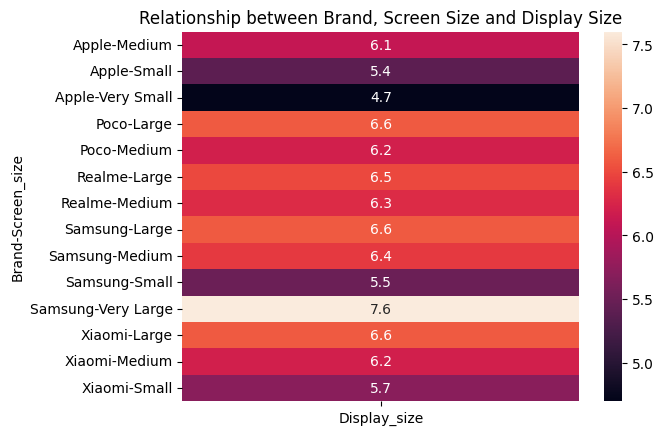

In [50]:
sns.heatmap(Breen, annot = True)
plt.title("Relationship between Brand, Screen Size and Display Size")
plt.show()

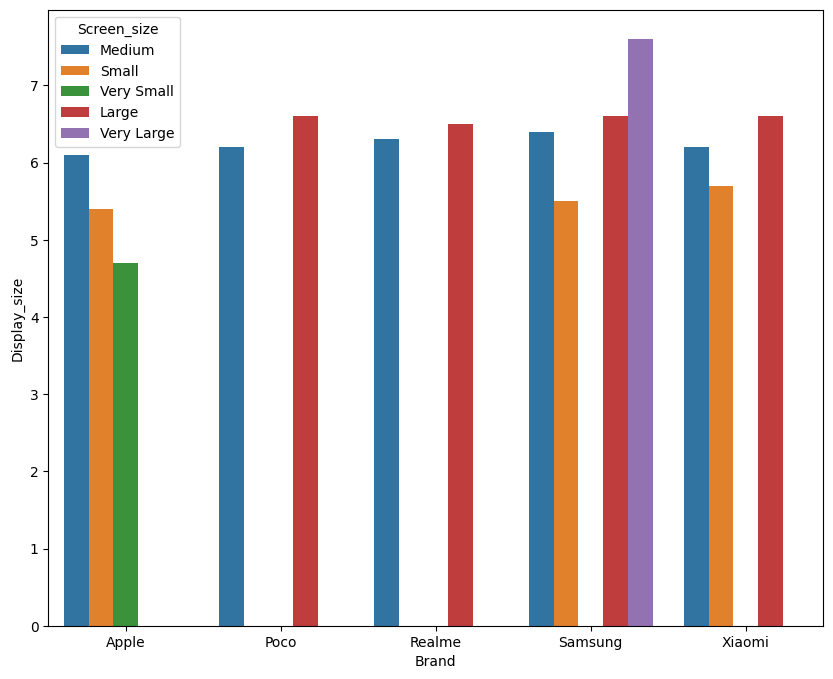

In [55]:
plt.figure(figsize = (10, 8))
sns.barplot(Breen, x = "Brand", y = "Display_size", hue = "Screen_size")
plt.show()

* Hence we have analysed that even though plones of different brands lie in same Screen_size category but they have different Display_size

## Distribution based on Base_color

In [56]:
print(df["Base_color"].unique())

['Black' 'Red' 'Others' 'Blue' 'White' 'Green' 'Purple' 'Yellow' 'Gold'
 'Bronze' 'Silver' 'Gray']


In [61]:
Black_color = df.loc[(df["Base_color"] == "Black")].count()
Red_color = df.loc[(df["Base_color"] == "Red")].count()
Blue_color = df.loc[(df["Base_color"] == "Blue")].count()
White_color = df.loc[(df["Base_color"] == "White")].count()
Green_color = df.loc[(df["Base_color"] == "Green")].count()
Purple_color = df.loc[(df["Base_color"] == "Purple")].count()
Yellow_color = df.loc[(df["Base_color"] == "Yellow")].count()
Gold_color = df.loc[(df["Base_color"] == "Gold")].count()
Bronze_color = df.loc[(df["Base_color"] == "Bronze")].count()
Silver_color = df.loc[(df["Base_color"] == "Silver")].count()
Gray_color = df.loc[(df["Base_color"] == "Gray")].count()
Other_color = df.loc[(df["Base_color"] == "Other")].count()

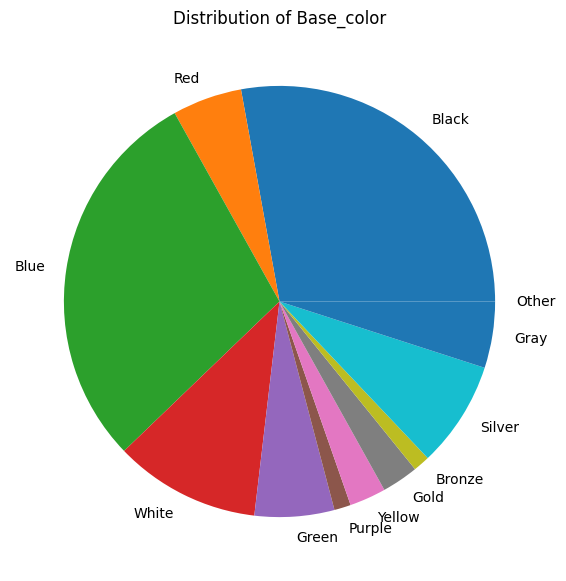

In [87]:
Color_list = [Black_color["Base_color"], Red_color["Base_color"], Blue_color["Base_color"], 
              White_color["Base_color"], Green_color["Base_color"], Purple_color["Base_color"], 
              Yellow_color["Base_color"], Gold_color["Base_color"], Bronze_color["Base_color"], 
              Silver_color["Base_color"], Gray_color["Base_color"], Other_color["Base_color"]]
label = ["Black", "Red", "Blue", "White", "Green", "Purple", "Yellow", "Gold", "Bronze", "Silver", "Gray", "Other"]

plt.figure(figsize = (7, 7))
plt.pie(Color_list, labels = label)
plt.title("Distribution of Base_color")
plt.show()

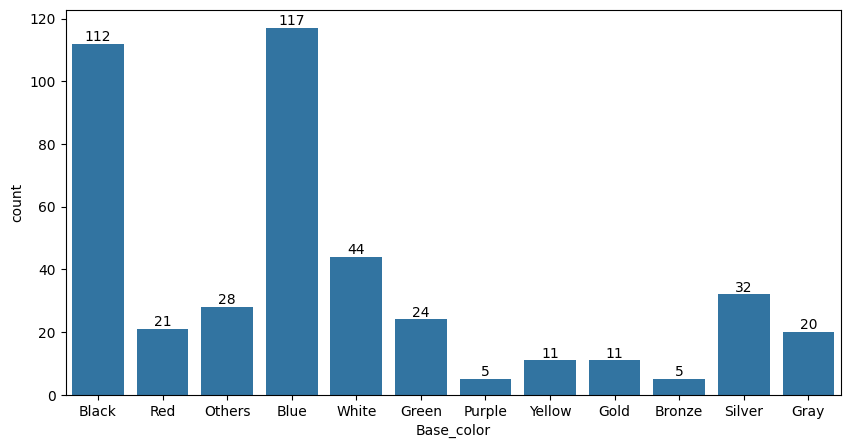

In [76]:
plt.figure(figsize = (10,5))
axis = sns.countplot(df, x = "Base_color")
axis.bar_label(axis.containers[0])
plt.show()

* Hence, we have determined that blue is the most ordered and purple is the least ordered base color in phones.

# Future Predictions
Based on the above analysis, the following predictions can be made about future mobile sales:

## Market Share Trends
1. **Realme** will likely continue to dominate the market due to its current popularity.
2. **Samsung** and **Xiaomi** will maintain their positions as significant players.
3. **Apple** and **Poco** might need to innovate or adjust pricing to increase their market share.

## Processor Influence
* Consumers will continue to prefer phones with **higher-rated processors**. Manufacturers investing in better processors will likely see better sales and customer satisfaction.

## Price Trends with Specifications
1. **RAM and ROM**: As new models with higher RAM and ROM are introduced, their prices will increase. However, brands offering a balance between price and these specifications may capture a larger market.
2. **Battery Capacity**: Phones with higher battery capacity might become more popular as users look for longer-lasting devices, which will also reflect in pricing strategies.
3. **Screen and Display Size**: Larger screen sizes and better display quality will continue to be a selling point. Brands offering superior display technology at competitive prices might see increased sales.

# Strategic Recommendations

## For Brands
1. **Realme**: Continue focusing on high-performance, cost-effective models to maintain market leadership.
2. **Samsung** and **Xiaomi**: Consider innovation in mid-range models to capture more market share.
3. **Apple** and **Poco**: Evaluate pricing strategies or introduce budget-friendly models to increase sales.

## For New Entrants
1. Focus on competitive pricing with high **RAM**, **ROM**, and **battery capacity** to attract customers.
2. Invest in marketing the superiority of **processors** and **display technology**.

### General suggestion
1. Keep an eye on **emerging technologies** (e.g., 5G, foldable screens) as they can shift market dynamics.
2. Monitor **consumer feedback** and adapt quickly to changes in **customer preferences** and **technological advancements**.